In [1]:
import pandas as pd
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df_raw = pd.read_csv('review_2.csv',encoding='euckr')

In [3]:
df_raw.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_jud

In [4]:
g_2 = df_raw[df_raw['review_cat'] !='혈액검사'].drop('Unnamed: 0',axis=1)
g_2

,Unnamed: 0.1,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm,n_risk
2,38,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.7,53.3,26.5,0.0
3,138,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,27.5,53.9,26.9,0.0
4,236,C112727,일반검진,승인,2015-06-24,1,65,160,50,89.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19.5,41.2,15.5,0.0
5,239,C112730,일반검진,승인,2015-09-01,1,65,164,64,97.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23.8,48.8,23.0,0.0
6,249,C112742,일반검진,승인,2015-09-02,1,65,169,62,89.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.7,42.6,17.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,14846,C134065,일반검진,재검,2015-06-15,2,53,158,54,88.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.6,49.4,35.5,0.0
4059,14866,C134107,일반검진,재검,2015-07-12,2,55,158,63,98.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.2,50.6,36.5,0.0
4074,14911,C134186,일반검진,승인,2015-05-12,2,38,161,65,94.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,25.1,49.7,35.8,0.0
4077,14931,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22.3,40.2,26.3,0.0


In [5]:
g_2.isna().sum()

Unnamed: 0.1         0
customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judg

In [6]:
g_test = g_2[['customer_id','gender', 'age',
       'height', 'weight', 'bust', 'waist', 'bmi', 'whtr', 'bp_min', 'bp_max',
       'pulse_count', 'bp_judge', 'pulse_count_judge', 'judge_score', 'n_risk']]

In [7]:
g_test

,customer_id,gender,age,height,weight,bust,waist,bmi,whtr,bp_min,bp_max,pulse_count,bp_judge,pulse_count_judge,judge_score,n_risk
2,C112411,1,69,165,70,92.0,88.0,25.7,53.3,75,120,68.0,0,0,0,0.0
3,C112570,1,67,165,75,95.0,89.0,27.5,53.9,90,140,70.0,1,0,1,0.0
4,C112727,1,65,160,50,89.0,66.0,19.5,41.2,80,130,64.0,1,0,0,0.0
5,C112730,1,65,164,64,97.0,80.0,23.8,48.8,80,125,68.0,1,0,0,0.0
6,C112742,1,65,169,62,89.0,72.0,21.7,42.6,80,120,70.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4052,C134065,2,53,158,54,88.0,78.0,21.6,49.4,80,110,80.0,0,0,0,0.0
4059,C134107,2,55,158,63,98.0,80.0,25.2,50.6,80,135,70.0,1,0,1,0.0
4074,C134186,2,38,161,65,94.0,80.0,25.1,49.7,70,110,72.0,0,0,0,0.0
4077,C134250,2,52,164,60,90.0,66.0,22.3,40.2,80,120,70.0,0,0,0,0.0


## 탐색적 분석

In [8]:
def myhist(data,var):
    plt.hist(data[data['n_risk']==0][var],label = '저위험', alpha = 0.5)
    plt.hist(data[data['n_risk']==1][var],label = '고위험', alpha = 0.5)
    plt.legend()
    
def mycrosstab(data,var) : 
    print(pd.crosstab(index = data['n_risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['n_risk'], columns = data[var],normalize = 'columns').round(3))
    
def my_t(data,var):
    k = stats.levene(data[data['n_risk']==0][var],data[data['n_risk']==1][var])
    t_result = stats.ttest_ind(data[data['n_risk']==0][[var]],
                               data[data['n_risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

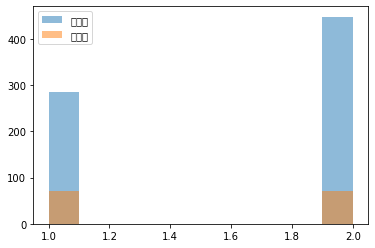

In [9]:
myhist(g_test,'gender')

In [10]:
mycrosstab(g_test,'gender')

gender    1    2
n_risk          
0.0     285  448
1.0      71   70

gender      1      2
n_risk              
0.0     0.801  0.865
1.0     0.199  0.135


In [11]:
a = 285 ; b = 448 ; c = 71 ; d = 71

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3))) # 유의

p-value는 0.014


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

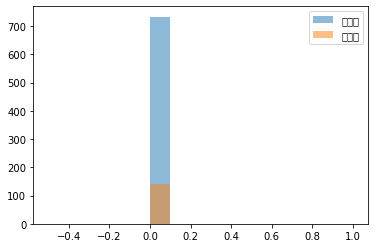

In [12]:
myhist(g_test,'pulse_count_judge') # pulse count 1 고객 존재 X -> 판단 불가, 제외

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

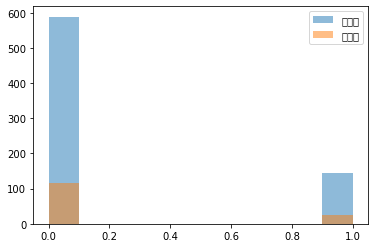

In [13]:
myhist(g_test,'bp_judge')

In [14]:
mycrosstab(g_test,'bp_judge')

bp_judge    0    1
n_risk            
0.0       589  144
1.0       115   26

bp_judge      0      1
n_risk                
0.0       0.837  0.847
1.0       0.163  0.153


In [15]:
a = 589 ; b = 144 ; c = 116 ; d = 26

count = np.array([a,b])
num = np.array([a+c,b+d])

stat, p_value = proportions_ztest(count,num)
print('p-value는 {:.3f}'.format(p_value.round(3)))

p-value는 0.713


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

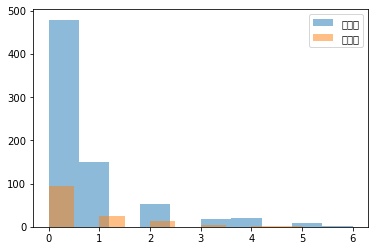

In [16]:
myhist(g_test,'judge_score')

In [17]:
mycrosstab(g_test,'judge_score')

judge_score    0    1   2   3   4  5  6
n_risk                                 
0.0          479  151  53  17  21  9  3
1.0           94   26  13   5   1  2  0

judge_score      0      1      2      3      4      5    6
n_risk                                                    
0.0          0.836  0.853  0.803  0.773  0.955  0.818  1.0
1.0          0.164  0.147  0.197  0.227  0.045  0.182  0.0


In [18]:
df = pd.DataFrame({'A':[479,151,53,17,21,9,3],'B':[95,26,13,5,1,2,0]})
chi, p, dof, expected = stats.chi2_contingency(df.T) #테이블 형태로 넣는다는 의미
print('검정 통계량은 {0} p-value는 {1})'.format(chi.round(3), p.round(6)))

검정 통계량은 4.441 p-value는 0.617276)


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

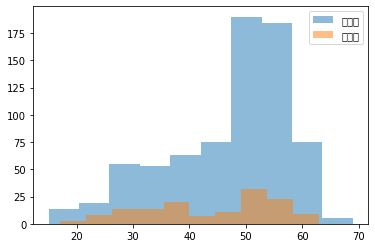

In [19]:
myhist(g_test,'age')

In [20]:
my_t(g_test,'age') # 유의

LeveneResult(statistic=7.159049805870636, pvalue=0.007598513959022473) [0.00113725]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

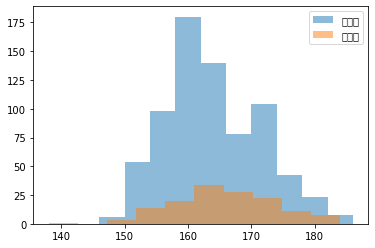

In [21]:
myhist(g_test,'height')

In [22]:
my_t(g_test,'height')

LeveneResult(statistic=0.5484859544883232, pvalue=0.45913635979085865) [0.00043311]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

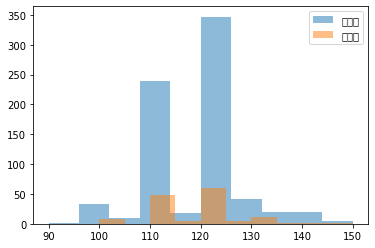

In [23]:
myhist(g_test,'bp_max')

In [24]:
my_t(g_test,'bp_max')

LeveneResult(statistic=3.33589767690645e-05, pvalue=0.9953929864086781) [0.62310995]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

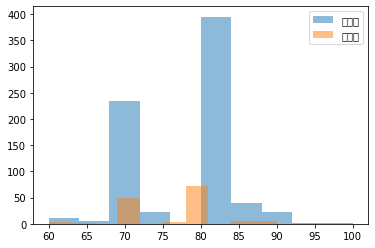

In [25]:
myhist(g_test,'bp_min')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

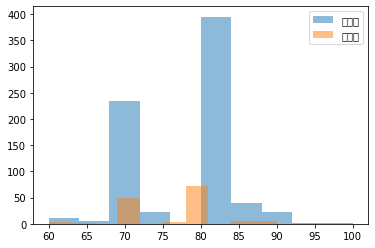

In [26]:
myhist(g_test,'bp_min')

In [27]:
my_t(g_test,'bp_min')

LeveneResult(statistic=0.5880012293092096, pvalue=0.44340062179849793) [0.28984647]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

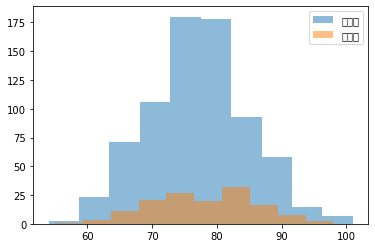

In [28]:
myhist(g_test,'waist')

In [29]:
my_t(g_test,'waist')

LeveneResult(statistic=1.610300504083055, pvalue=0.20478817785936784) [0.22703556]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

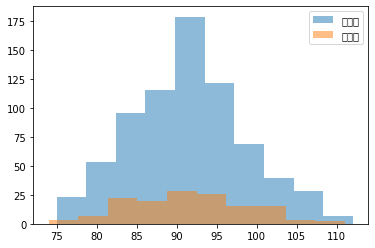

In [30]:
myhist(g_test,'bust')

In [31]:
my_t(g_test,'bust')

LeveneResult(statistic=0.2106097071374682, pvalue=0.646404307619972) [0.92782201]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

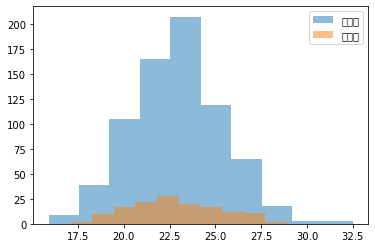

In [32]:
myhist(g_test,'bmi')

In [33]:
my_t(g_test,'bmi')

LeveneResult(statistic=0.10379525675793459, pvalue=0.7473990762896638) [0.4909788]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

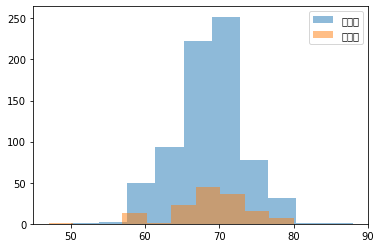

In [34]:
myhist(g_test,'pulse_count')

In [35]:
my_t(g_test,'pulse_count')

LeveneResult(statistic=1.0474330914761747, pvalue=0.3063828434234458) [0.97573603]


/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeW

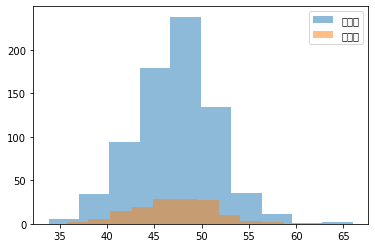

In [36]:
myhist(g_test,'whtr')

In [37]:
my_t(g_test,'whtr')

LeveneResult(statistic=0.18810592090329661, pvalue=0.6646050159856605) [0.58616039]


#### age, gender 유의

### 로지스틱 탐색

In [38]:
g_num = g_test.select_dtypes(exclude = 'object')

In [39]:
log_model = Logit.from_formula(''' n_risk ~ C(gender) + age + height + bust
+bmi+whtr+bp_min+bp_max+pulse_count + C(pulse_count_judge) +C(judge_score)+ waist + weight+
C(bp_judge)''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.419852
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  874
Model:                          Logit   Df Residuals:                      854
Method:                           MLE   Df Model:                           19
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.04982
Time:                        01:04:08   Log-Likelihood:                -366.95
converged:                      False   LL-Null:                       -386.19
Covariance Type:            nonrobust   LLR p-value:                  0.005158
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    17.9617     25.448      0.706      0.480     -31.915      67.838
C(gender)[T.2]      

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
df_x = g_num.drop(['n_risk','waist','weight'],axis = 1)
df_x # 종속 변수 빼고 새롭게 데이터 프레임 생성
df_x_const = add_constant(df_x) # const열 생성

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3) # 다중공선성 존재 X -> 회귀식 자체로 판단

,variable,VIF
12,judge_score,1.014
11,pulse_count_judge,1.035
9,pulse_count,1.048
2,age,1.307
10,bp_judge,1.901
1,gender,2.632
5,bmi,3.045
7,bp_min,3.341
6,whtr,3.429
3,height,3.482


In [41]:
log_model = Logit.from_formula(''' n_risk ~ C(gender) + age + height + bust
+bmi+whtr+bp_min+bp_max+pulse_count + C(pulse_count_judge) +C(judge_score)+
C(bp_judge)''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.420606
         Iterations: 35


/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  874
Model:                          Logit   Df Residuals:                      856
Method:                           MLE   Df Model:                           17
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.04811
Time:                        01:04:09   Log-Likelihood:                -367.61
converged:                      False   LL-Null:                       -386.19
Covariance Type:            nonrobust   LLR p-value:                  0.003203
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.2909      4.286     -1.934      0.053     -16.692       0.110
C(gender)[T.2]               -0.0432      0.307     -0.141      0.888      -0.645     

### 다중 공선성

In [42]:
df_y = g_num['n_risk']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 4).fit(df_x,df_y)
# df_x는 다중 공선성으로 제거 후 남은 x인자만 존재
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("select variables : ",selected_cols)
print("removed variable : ",removed_cols)

select variables :  Index(['height', 'bmi', 'pulse_count_judge', 'judge_score'], dtype='object')
removed variable :  Index(['gender', 'age', 'bust', 'whtr', 'bp_min', 'bp_max', 'pulse_count',
       'bp_judge'],
      dtype='object')


In [43]:
log_model = Logit.from_formula(''' n_risk ~ C(gender)+bmi+whtr+pulse_count_judge''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

         Current function value: 0.435074
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  874
Model:                          Logit   Df Residuals:                      869
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.01537
Time:                        01:04:09   Log-Likelihood:                -380.25
converged:                      False   LL-Null:                       -386.19
Covariance Type:            nonrobust   LLR p-value:                   0.01835
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2620      1.127     -0.232      0.816      -2.471       1.947
C(gender)[T.2]       -0.5422      0.192     

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 유의수준 

In [44]:
log_model = Logit.from_formula(''' n_risk ~ age + height + bust
+whtr''',data = g_num)
log_result = log_model.fit()
print(log_result.summary())

# 판정은 0 아니면 1 따라서, 스케일은 진행하지 X

Optimization terminated successfully.
         Current function value: 0.428766
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 n_risk   No. Observations:                  874
Model:                          Logit   Df Residuals:                      869
Method:                           MLE   Df Model:                            4
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.02964
Time:                        01:04:09   Log-Likelihood:                -374.74
converged:                       True   LL-Null:                       -386.19
Covariance Type:            nonrobust   LLR p-value:                 0.0001328
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3884      2.423     -3.462      0.001     -13.137      -3.640
age           -0.0220      0.

### 정확도/정밀도 RF 모델

- 변수 정리 : 'age','height','bust','whtr' 0.825 / 0.625
- 검정 결과 : 'age','gender'
- 다중 공선성 : 'gender', 'bmi', 'whtr', 'pulse_count_judge'

## 모델링

In [45]:
ensem_x = g_test[['age','height','bust','whtr']]
ensem_y = g_test[['n_risk']]

ensem_x = pd.get_dummies(ensem_x)

# scaler = StandardScaler()
# en_sc = scaler.fit_transform(ensem_x)
# ensem_x = pd.DataFrame(en_sc,columns=ensem_x.columns)

# 데이터 분할 1 : 학습용과 시험용

train_x, test_x, train_y, test_y = train_test_split(ensem_x,ensem_y,test_size=0.3,random_state = 1234)
# 학습용 데이터를 밸리데이션과 학습용으로 분할함으로써 CV진행 준비
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size = 3/7, random_state = 1234)

In [46]:
gb_final = RandomForestClassifier(random_state=1234)
gb_final.fit(train_x,train_y)

print()
print('초기 모델의 train data의 설명력 : {:.3f}'.format(gb_final.score(train_x,train_y)))
print('초기 모델의 validation data의 설명력 : {:.3f}'.format(gb_final.score(val_x,val_y)))
print('초기 모델의 test data의 설명력 : {:.3f}'.format(gb_final.score(test_x,test_y)))

<ipython-input-46-0d61179c3f5d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gb_final.fit(train_x,train_y)



초기 모델의 train data의 설명력 : 1.000
초기 모델의 validation data의 설명력 : 0.798
초기 모델의 test data의 설명력 : 0.829


In [47]:
y_pred=gb_final.predict(test_x)
print('Accuracy:{0:.3f}\n'.format(gb_final.score(test_x,test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(test_y,y_pred)))

#분석 모델
model=['GradientBoosting']
#정확도 저장
train_accuracy=[]; test_accuracy=[]
#f1 score 저장
model_f1_score=[]
#auc score 저장
model_auc=[]
#precision score저장
model_precision_score=[]
#recall score 저장
model_recall_score=[]

#최종 모델
gb_model=RandomForestClassifier(random_state=1234)
gb_model.fit(train_x,train_y)
# train 정확도
train_accuracy.append(gb_model.score(train_x, train_y))
# test 정확도
test_accuracy.append(gb_model.score(test_x, test_y))
#최종 모델을 이용한 분류 예측
y_pred=gb_model.predict(test_x)
#roc_curve(실제값,예측값) fpr=(FP)/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성비율(재현율)
fpr,tpr,thresholds=roc_curve(test_y,y_pred)
roc_auc=auc(fpr,tpr)
#auc 저장
model_auc.append(roc_auc)

#f1스코어
model_f1_score.append(f1_score(test_y,y_pred))
#precision 스코어
model_precision_score.append(precision_score(test_y,y_pred))
#recall 스코어
model_recall_score.append(recall_score(test_y,y_pred))

df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy
df_eval['TestAccuracy']=test_accuracy
df_eval['F1Score']=model_f1_score
df_eval['AUC']=model_auc
df_eval['PrecisionScore']=model_precision_score
df_eval['RecallScore']=model_recall_score
df_eval.round(3)

Accuracy:0.829

Confusion matrix:
[[218   3]
 [ 42   0]]


<ipython-input-47-037acec6d34c>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gb_model.fit(train_x,train_y)


,TrainAccuracy,TestAccuracy,F1Score,AUC,PrecisionScore,RecallScore
GradientBoosting,1.0,0.829,0.0,0.493,0.0,0.0


-> 정밀도 고려 최종 변수 선택 : 'age','height','bust','whtr'

-> 일반검사 기준 낮은 정밀도, 추가적인 건강검진 기준 보완 요구(Screen data 활용)

## 2분류 거절 고객 분류

In [48]:
df_danger = pd.read_csv('danger_reject_g.csv',encoding='euckr')
df_danger = df_danger[['customer_id']]
df_danger

,customer_id
0,C112409
1,C112414
2,C112421
3,C112437
4,C112449
...,...
465,C134023
466,C134058
467,C134153
468,C134160


In [51]:
df_raw = pd.read_csv('insu_pre_review.csv',encoding='euckr')
df_test = df_raw[df_raw['judge']=='거절']
df_test = df_test[df_test['review_cat'] != '혈액검사']
df_test = pd.merge(df_danger,df_test,on='customer_id',how='left')
df_test["whtr"] = round((df_test["weight"])/((df_test["height"]/100)**2),1)

df_reject = df_test[['age','height','bust','whtr']]

# df_reject = pd.get_dummies(df_reject)
# en_sc_2 = scaler.fit_transform(df_reject)
# df_reject = pd.DataFrame(en_sc_2,columns=df_reject.columns)

In [52]:
df_reject

,age,height,bust,whtr
0,69,178,99.0,23.7
1,68,165,94.0,25.7
2,69,165,93.0,20.2
3,68,163,100.0,22.6
4,67,164,93.0,20.4
...,...,...,...,...
465,63,156,90.0,20.5
466,69,158,103.0,28.0
467,37,161,80.0,20.4
468,53,150,91.0,26.7


In [53]:
pred = gb_model.predict(df_reject)
df_reject['n_risk'] = pred
df_reject['customer_id'] = df_test['customer_id']

<ipython-input-53-76d832e745ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reject['n_risk'] = pred
<ipython-input-53-76d832e745ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reject['customer_id'] = df_test['customer_id']


In [54]:
df_reject.groupby('n_risk').count()

,age,height,bust,whtr,customer_id
n_risk,,,,,
0.0,444,444,444,444,444
1.0,26,26,26,26,26


### 저위험 고객 469명, 고위험 고객 7명 -> 혈액 검사 기준
### 고위험 고객 거절 유지, 저위험 고객 상품 추천 및 할증 진행

In [55]:
# 데이터 내보내기

df_high = df_reject[df_reject['n_risk'] == 1][['customer_id']]
df_low = df_reject[df_reject['n_risk'] == 0][['customer_id']]

df_high.to_csv('high_danger_g.csv',encoding='euckr')
df_low.to_csv('low_danger_g.csv',encoding='euckr')